In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn==1.3.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
sample = pd.read_csv('/content/SampleSubmission.csv')
sample

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0
3,tour_1006,0
4,tour_1009,0
...,...,...
1596,tour_988,0
1597,tour_990,0
1598,tour_992,0
1599,tour_996,0


In [3]:
train_data = pd.read_csv('/content/Train (1).csv')
test_data = pd.read_csv('/content/Test.csv')

In [4]:
pd.set_option('display.max_columns', None)
train_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [5]:
test_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [6]:
train_data.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [9]:
train_data.shape, test_data.shape

((4809, 23), (1601, 22))

In [10]:
train_data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [11]:
test_data.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

## Handling NULL values

In [12]:
#Replacing travel_with, total_female and total_male columns with 0 for train data
train_data['total_female'].fillna(0, inplace=True)
train_data['total_male'].fillna(0, inplace=True)

# Replace most_impressing column with No most Impressing
#text_value = 'No most impression'
train_data['most_impressing'].fillna('No most impression', inplace=True)
train_data['travel_with'].fillna('Alone', inplace=True)

In [13]:
#Replacing travel_with, total_female and total_male columns with 0 for test data
test_data['total_female'].fillna(0, inplace=True)
test_data['total_male'].fillna(0, inplace=True)

# Replace most_impressing column with No most Impression
#text_value = 'No most impression'
test_data['most_impressing'].fillna('No most impreaaion', inplace=True)
test_data['travel_with'].fillna('Alone', inplace=True)

In [14]:
train_data.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

In [15]:
test_data.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
dtype: int64

In [16]:
train_data.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926180,1.008526,8.488043,2.304429,8.114389e+06
std,1.288048,1.138738,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [17]:
data_id = test_data.ID

In [18]:
train_data.drop(['ID'], axis = 1 , inplace = True)
test_data.drop(['ID'], axis = 1 , inplace = True)

## Exploring the dataset (EDA)

In [19]:
train_data['tour_arrangement'].value_counts()

Independent     2570
Package Tour    2239
Name: tour_arrangement, dtype: int64

In [20]:
train_data['age_group'].value_counts()

25-44    2487
45-64    1391
1-24      624
65+       307
Name: age_group, dtype: int64

In [21]:
train_data['country'].value_counts().head(15)

UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
SOUTH AFRICA                235
KENYA                       235
GERMANY                     223
ZAMBIA                      191
AUSTRALIA                   186
SPAIN                       165
UGANDA                      159
CANADA                      114
NETHERLANDS                 112
INDIA                        87
Name: country, dtype: int64

In [22]:
train_data['country'].value_counts().tail(15)

MADAGASCAR          1
CYPRUS              1
IRAQ                1
COSTARICA           1
CAPE VERDE          1
ANGOLA              1
MONTENEGRO          1
COMORO              1
SLOVENIA            1
TRINIDAD TOBACCO    1
NIGER               1
MYANMAR             1
DOMINICA            1
TUNISIA             1
ESTONIA             1
Name: country, dtype: int64

In [23]:
train_data['payment_mode'].value_counts()

Cash                 4172
Credit Card           622
Other                   8
Travellers Cheque       7
Name: payment_mode, dtype: int64

In [24]:
train_data['purpose'].value_counts()

Leisure and Holidays              2840
Business                           671
Visiting Friends and Relatives     633
Meetings and Conference            312
Volunteering                       138
Other                              128
Scientific and Academic             87
Name: purpose, dtype: int64

In [25]:
vis_data = train_data.copy()

##Visualizing them out

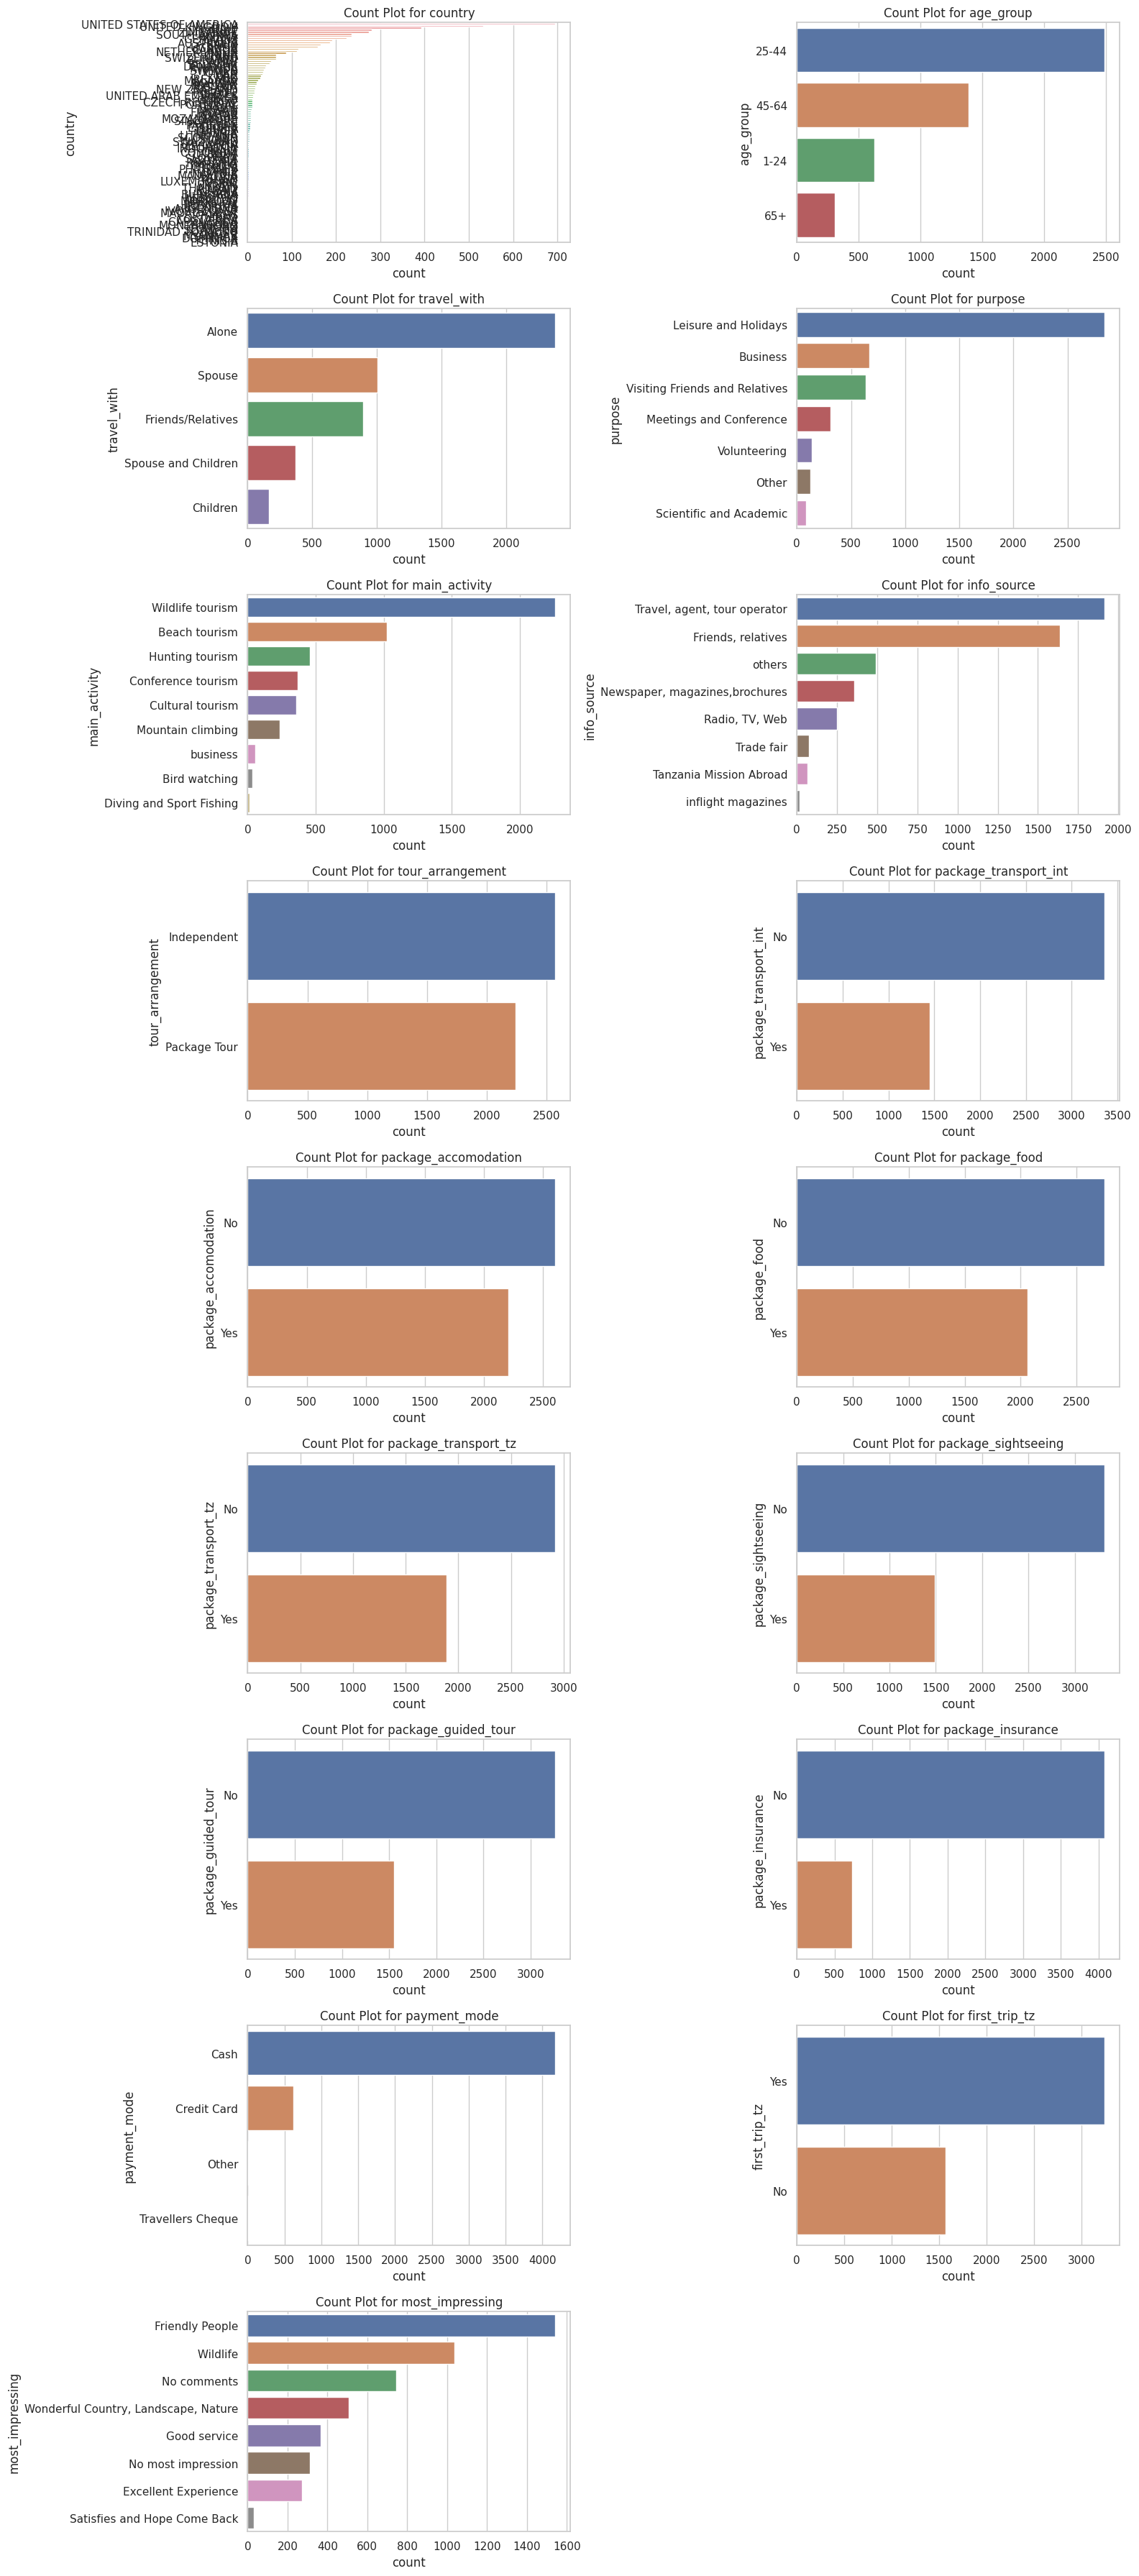

In [26]:
# Assuming df is your DataFrame
#categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
categorical_features = vis_data.select_dtypes(include=['object', 'category']).columns

sns.set(style="whitegrid")

# Determine the grid size (rows x columns)
n_cols = 2  # Number of columns
n_rows = int(len(categorical_features) / n_cols) + (len(categorical_features) % n_cols > 0)

# Create a subplot for each categorical feature
plt.figure(figsize=(16, n_rows * 4))  # Adjust the figure size here
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(y=feature, data=vis_data, order=vis_data[feature].value_counts().index)
    plt.title(f'Count Plot for {feature}')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [27]:
train_data['country'].unique()

array(['SWIZERLAND', 'UNITED KINGDOM', 'CHINA', 'SOUTH AFRICA',
       'UNITED STATES OF AMERICA', 'NIGERIA', 'INDIA', 'BRAZIL', 'CANADA',
       'MALT', 'MOZAMBIQUE', 'RWANDA', 'AUSTRIA', 'MYANMAR', 'GERMANY',
       'KENYA', 'ALGERIA', 'IRELAND', 'DENMARK', 'SPAIN', 'FRANCE',
       'ITALY', 'EGYPT', 'QATAR', 'MALAWI', 'JAPAN', 'SWEDEN',
       'NETHERLANDS', 'UAE', 'UGANDA', 'AUSTRALIA', 'YEMEN',
       'NEW ZEALAND', 'BELGIUM', 'NORWAY', 'ZIMBABWE', 'ZAMBIA', 'CONGO',
       'BURGARIA', 'PAKISTAN', 'GREECE', 'MAURITIUS', 'DRC', 'OMAN',
       'PORTUGAL', 'KOREA', 'SWAZILAND', 'TUNISIA', 'KUWAIT', 'DOMINICA',
       'ISRAEL', 'FINLAND', 'CZECH REPUBLIC', 'UKRAIN', 'ETHIOPIA',
       'BURUNDI', 'SCOTLAND', 'RUSSIA', 'GHANA', 'NIGER', 'MALAYSIA',
       'COLOMBIA', 'LUXEMBOURG', 'NEPAL', 'POLAND', 'SINGAPORE',
       'LITHUANIA', 'HUNGARY', 'INDONESIA', 'TURKEY', 'TRINIDAD TOBACCO',
       'IRAQ', 'SLOVENIA', 'UNITED ARAB EMIRATES', 'COMORO', 'SRI LANKA',
       'IRAN', 'MONTENEGRO', 

In [28]:
# Define the mapping of countries to continents
country_to_continent = {
    'SWIZERLAND': 'Europe',
    'UNITED KINGDOM': 'Europe',
    'CHINA': 'Asia',
    'SOUTH AFRICA': 'Africa',
    'UNITED STATES OF AMERICA': 'North America',
    'NIGERIA': 'Africa',
    'INDIA': 'Asia',
    'BRAZIL': 'South America',
    'CANADA': 'North America',
    'MALT': 'Europe',
    'MOZAMBIQUE': 'Africa',
    'RWANDA': 'Africa',
    'AUSTRIA': 'Europe',
    'MYANMAR': 'Asia',
    'GERMANY': 'Europe',
    'KENYA': 'Africa',
    'ALGERIA': 'Africa',
    'IRELAND': 'Europe',
    'DENMARK': 'Europe',
    'SPAIN': 'Europe',
    'FRANCE': 'Europe',
    'ITALY': 'Europe',
    'EGYPT': 'Africa',
    'QATAR': 'Asia',
    'MALAWI': 'Africa',
    'JAPAN': 'Asia',
    'SWEDEN': 'Europe',
    'NETHERLANDS': 'Europe',
    'UAE': 'Asia',
    'UGANDA': 'Africa',
    'AUSTRALIA': 'Australia',
    'YEMEN': 'Asia',
    'NEW ZEALAND': 'Australia',
    'BELGIUM': 'Europe',
    'NORWAY': 'Europe',
    'ZIMBABWE': 'Africa',
    'ZAMBIA': 'Africa',
    'CONGO': 'Africa',
    'BURGARIA': 'Europe',
    'PAKISTAN': 'Asia',
    'GREECE': 'Europe',
    'MAURITIUS': 'Africa',
    'DRC': 'Africa',
    'OMAN': 'Asia',
    'PORTUGAL': 'Europe',
    'KOREA': 'Asia',
    'SWAZILAND': 'Africa',
    'TUNISIA': 'Africa',
    'KUWAIT': 'Asia',
    'DOMINICA': 'North America',
    'ISRAEL': 'Asia',
    'FINLAND': 'Europe',
    'CZECH REPUBLIC': 'Europe',
    'UKRAIN': 'Europe',
    'ETHIOPIA': 'Africa',
    'BURUNDI': 'Africa',
    'SCOTLAND': 'Europe',
    'RUSSIA': 'Europe',
    'GHANA': 'Africa',
    'NIGER': 'Africa',
    'MALAYSIA': 'Asia',
    'COLOMBIA': 'South America',
    'LUXEMBOURG': 'Europe',
    'NEPAL': 'Asia',
    'POLAND': 'Europe',
    'SINGAPORE': 'Asia',
    'LITHUANIA': 'Europe',
    'HUNGARY': 'Europe',
    'INDONESIA': 'Asia',
    'TURKEY': 'Asia',
    'TRINIDAD TOBACCO': 'North America',
    'IRAQ': 'Asia',
    'SLOVENIA': 'Europe',
    'UNITED ARAB EMIRATES': 'Asia',
    'COMORO': 'Africa',
    'SRI LANKA': 'Asia',
    'IRAN': 'Asia',
    'MONTENEGRO': 'Europe',
    'ANGOLA': 'Africa',
    'LEBANON': 'Asia',
    'SLOVAKIA': 'Europe',
    'ROMANIA': 'Europe',
    'MEXICO': 'North America',
    'LATVIA': 'Europe',
    'CROATIA': 'Europe',
    'CAPE VERDE': 'Africa',
    'SUDAN': 'Africa',
    'COSTARICA': 'North America',
    'CHILE': 'South America',
    'NAMIBIA': 'Africa',
    'TAIWAN': 'Asia',
    'SERBIA': 'Europe',
    'LESOTHO': 'Africa',
    'GEORGIA': 'Asia',
    'PHILIPINES': 'Asia',
    'IVORY COAST': 'Africa',
    'MADAGASCAR': 'Africa',
    'DJIBOUT': 'Africa',
    'CYPRUS': 'Asia',
    'ARGENTINA': 'South America',
    'URUGUAY': 'South America',
    'MORROCO': 'Africa',
    'THAILAND': 'Asia',
    'BERMUDA': 'North America',
    'ESTONIA': 'Europe',
}

# Create a function to map countries to continents
def map_to_continent(country):
    return country_to_continent.get(country, 'Unknown')

# Assuming you have a DataFrame named train_data with a "country" column
# Apply the mapping function to create a new "Continent" column
train_data['Continent'] = train_data['country'].apply(map_to_continent)

#For the test
test_data['Continent'] = test_data['country'].apply(map_to_continent)

# Print the updated DataFrame with the "Continent" column added
train_data.head(2)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,Continent
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,Europe
1,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,Europe


<ipython-input-29-730b479f5e22>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


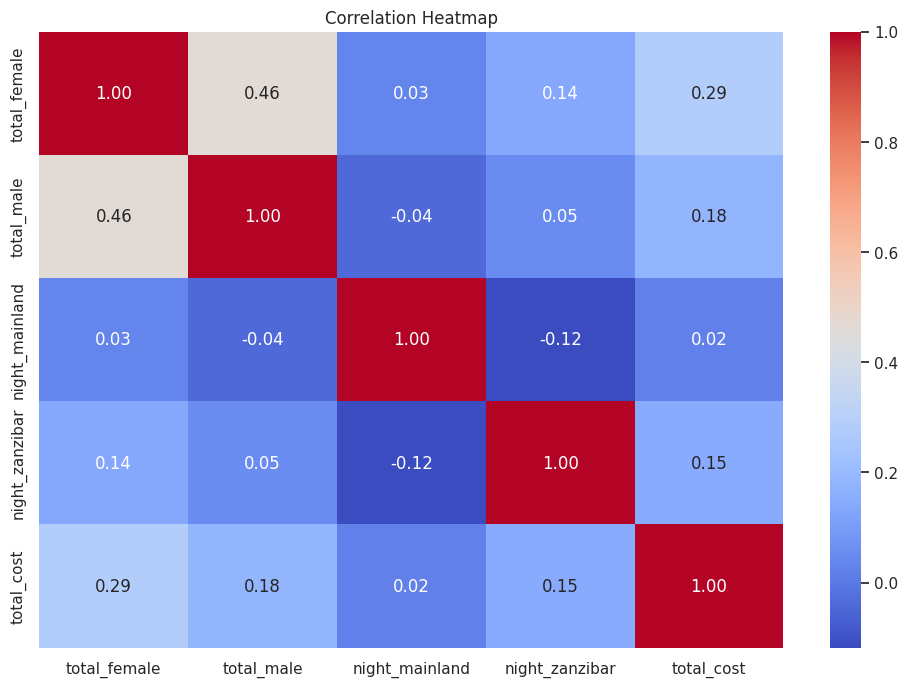

In [29]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")

plt.show()


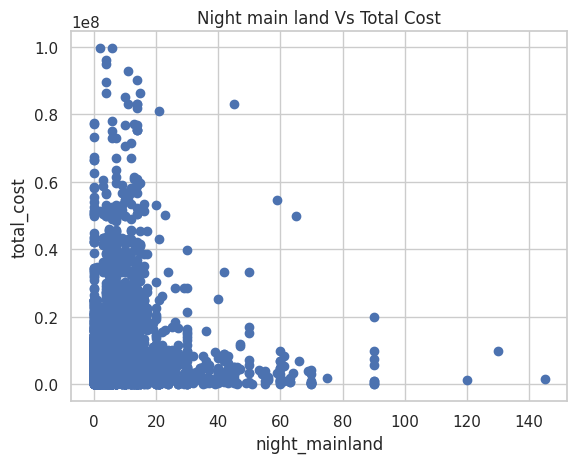

In [30]:

plt.scatter(train_data['night_mainland'], train_data['total_cost'])
plt.xlabel('night_mainland')
plt.ylabel('total_cost')
plt.title('Night main land Vs Total Cost')
plt.show()


In [31]:
## Encoding the Categorical Variables

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# Identify columns with 'object' data type (strings)
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode all categorical columns
for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])

# Now, all string columns are encoded with integer labels



In [34]:
# Identify columns with 'object' data type (strings)
categorical_columns = test_data.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode all categorical columns
for column in categorical_columns:
    test_data[column] = label_encoder.fit_transform(test_data[column])

# Now, all string columns are encoded with integer labels
# You can use df for further analysis or modeling


In [35]:
train_data.shape, test_data.shape

((4809, 23), (1601, 22))

In [36]:
train_data.columns

Index(['country', 'age_group', 'travel_with', 'total_female', 'total_male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'most_impressing', 'total_cost', 'Continent'],
      dtype='object')

##Generating more features

In [37]:
train_data['total_people'] = train_data['total_male'] + train_data['total_female']
test_data['total_people'] = test_data['total_male'] + test_data['total_female']

In [38]:
train_data['total_night_spent'] = train_data['night_zanzibar'] + train_data['night_mainland']
test_data['total_night_spent'] = test_data['night_zanzibar'] + test_data['night_mainland']


train_data['mgf2'] = train_data['payment_mode'] + train_data['purpose']
train_data['mgf3'] = train_data['country'] + train_data['tour_arrangement']
train_data['mgf4'] = train_data['total_people'] * train_data['age_group']
train_data['mf1'] = train_data['total_night_spent']*train_data['total_people']


test_data['mgf2'] = test_data['payment_mode'] + test_data['purpose']
test_data['mgf3'] = test_data['country'] + test_data['tour_arrangement']
test_data['mgf4'] = test_data['total_people'] * test_data['age_group']
test_data['mf1'] = test_data['total_night_spent']*test_data['total_people']


In [39]:
train_data.drop(['total_male', 'total_female', 'night_zanzibar', 'night_mainland', 'country', 'age_group'], axis = 1 , inplace = True)
test_data.drop(['total_male', 'total_female', 'night_zanzibar', 'night_mainland', 'country', 'age_group'], axis = 1 , inplace = True)

## Modeling Part

In [40]:
# Spliting my dataset into train and val
X = train_data.drop('total_cost', axis=1)  # Features
y = train_data['total_cost']               # Target


from sklearn.model_selection import train_test_split
# Splitting the training data into a smaller training subset and a validation subset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
!pip install catboost

In [42]:
!pip install catboost

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# Create a dictionary to store the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support_Vector_Machine': SVR(),
    'XGBoost': xgb.XGBRegressor(verbosity=1),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': CatBoostRegressor()
}

# Create a dictionary to store the cross-validated MAE scores for each model
cross_val_scores = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Perform 5-fold cross-validation and calculate the mean MAE
    mae_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cross_val_scores[model_name] = mae_scores.mean()

# Print the cross-validated MAE scores for each model
for model_name, mae_score in cross_val_scores.items():
    print(f'{model_name}: Cross-Validated MAE = {mae_score:.2f}')

# Find the best model based on the lowest cross-validated MAE
best_model_name = min(cross_val_scores, key=cross_val_scores.get)
best_mae = cross_val_scores[best_model_name]

print(f'Best Model: {best_model_name} (Cross-Validated MAE = {best_mae:.2f})')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.696e+16, tolerance: 4.847e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.036e+16, tolerance: 4.606e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.211e+16, tolerance: 4.436e

Streaming output truncated to the last 5000 lines.
14:	learn: 10636713.7321986	total: 182ms	remaining: 12s
15:	learn: 10561394.5140728	total: 186ms	remaining: 11.4s
16:	learn: 10489489.7487224	total: 194ms	remaining: 11.2s
17:	learn: 10416455.5515574	total: 202ms	remaining: 11s
18:	learn: 10350038.0571907	total: 206ms	remaining: 10.7s
19:	learn: 10286907.9509573	total: 211ms	remaining: 10.3s
20:	learn: 10229721.3044976	total: 218ms	remaining: 10.2s
21:	learn: 10181948.4800979	total: 222ms	remaining: 9.86s
22:	learn: 10139350.3011329	total: 226ms	remaining: 9.6s
23:	learn: 10080893.2097270	total: 230ms	remaining: 9.35s
24:	learn: 10034619.4125132	total: 236ms	remaining: 9.19s
25:	learn: 9988574.3016064	total: 240ms	remaining: 9s
26:	learn: 9949984.8281906	total: 245ms	remaining: 8.84s
27:	learn: 9900227.5166405	total: 250ms	remaining: 8.7s
28:	learn: 9860124.8776916	total: 263ms	remaining: 8.8s
29:	learn: 9822277.0777448	total: 268ms	remaining: 8.67s
30:	learn: 9783603.2697854	total: 27

In [44]:
# Find the best model based on the lowest cross-validated MAE
best_model_name = min(cross_val_scores, key=cross_val_scores.get)
best_model = models[best_model_name]  # Get the best model instance

print(f'Best Model: {best_model_name} (Cross-Validated MAE = {best_mae:.2f})')



Best Model: Gradient Boosting (Cross-Validated MAE = 5212669.32)


In [45]:
# Assuming best_model is the best model selected based on cross-validation

# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(test_data)

# Now, y_pred contains the predicted values for your test data


In [46]:
submission = pd.DataFrame({
    'ID': data_id,  # Replace with your actual test IDs
    'total_cost': y_pred
})


submission.to_csv('submission_1_1.csv', index=False)

<Axes: >

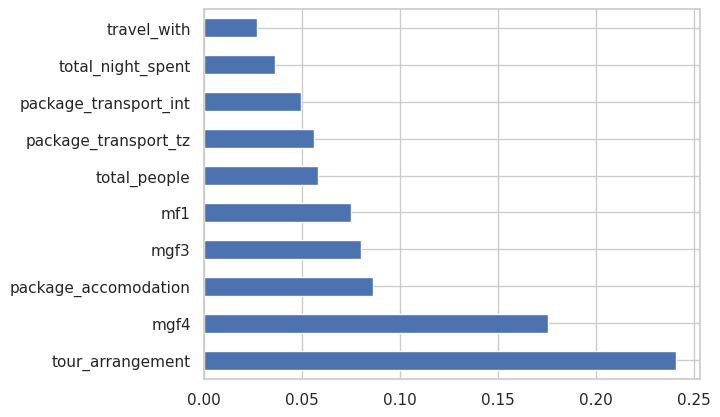

In [47]:
#Feature importance plot.

feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

## HyperParameter Tuning

In [48]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(gb_model, param_grid, scoring='neg_mean_absolute_error', cv=5)

# Perform the hyperparameter search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator
best_hyperparameters = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the final model with the best hyperparameters on the entire training dataset
best_estimator.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_estimator.predict(X_val)

# Evaluate the tuned model on the test data
mae = mean_absolute_error(y_val, y_pred)
print(f'Tuned Gradient Boosting MAE on Test Data: {mae:.2f}')

# Get the best hyperparameters
print('Best Hyperparameters:', best_hyperparameters)
'''

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import GradientBoostingRegressor\nfrom sklearn.metrics import mean_absolute_error\n\n# Define the hyperparameter grid for Gradient Boosting\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'learning_rate': [0.01, 0.1, 0.2],\n    'max_depth': [3, 4, 5],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\n\n# Create the Gradient Boosting Regressor model\ngb_model = GradientBoostingRegressor()\n\n# Create the GridSearchCV object\ngrid_search = GridSearchCV(gb_model, param_grid, scoring='neg_mean_absolute_error', cv=5)\n\n# Perform the hyperparameter search on the training data\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters and best estimator\nbest_hyperparameters = grid_search.best_params_\nbest_estimator = grid_search.best_estimator_\n\n# Train the final model with the best hyperparameters on the entire training dataset\nbest_estimator.fit(X_train, y_train)\n\

In [49]:
pip install optuna

In [50]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Define the objective function to optimize
def objective(trial):
    # Define the hyperparameter search space for Gradient Boosting
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 5),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
    }

    # Create the Gradient Boosting Regressor model with the sampled hyperparameters
    gb_model = GradientBoostingRegressor(**params)

    # Split your data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model on the training data
    gb_model.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = gb_model.predict(X_val)

    # Calculate the Mean Absolute Error (MAE) on the validation data
    mae = mean_absolute_error(y_val, y_pred)

    return mae

# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)  # You can adjust the number of trials as needed

# Get the best hyperparameters
best_params = study.best_params
print('Best Hyperparameters:', best_params)

# Create the final Gradient Boosting Regressor model with the best hyperparameters
best_gb_model = GradientBoostingRegressor(**best_params)

# Fit the best model on the full training data
best_gb_model.fit(X, y)


[I 2024-01-01 18:19:09,013] A new study created in memory with name: no-name-a432956e-aba3-4595-b7ce-91b8de59d4a1
<ipython-input-50-18a52d2e0965>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
[I 2024-01-01 18:19:10,194] Trial 0 finished with value: 5066700.969555794 and parameters: {'n_estimators': 105, 'learning_rate': 0.02136601796658407, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: 5066700.969555794.
<ipython-input-50-18a52d2e0965>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0

Best Hyperparameters: {'n_estimators': 170, 'learning_rate': 0.04493202918928471, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 4}


GradientBoostingRegressor(learning_rate=0.04493202918928471, max_depth=4,
                          min_samples_leaf=4, min_samples_split=10,
                          n_estimators=170)

In [51]:
# Make predictions on the test data (assuming 'test_data' is defined)
y_test_pred = best_gb_model.predict(test_data)


In [52]:
submission = pd.DataFrame({
    'ID': data_id,  # Replace with your actual test IDs
    'total_cost': y_test_pred
})


submission.to_csv('submission_1_11.csv', index=False)

## Saving the trained model

In [53]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [54]:
import pickle

In [55]:
pickle_out = open("best_classifier.pkl", mode = "wb")
pickle.dump(best_gb_model, pickle_out)
pickle_out.close()

In [56]:
X.columns

Index(['travel_with', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'payment_mode',
       'first_trip_tz', 'most_impressing', 'Continent', 'total_people',
       'total_night_spent', 'mgf2', 'mgf3', 'mgf4', 'mf1'],
      dtype='object')

In [57]:
X.mgf4.unique()

array([ 4.,  1.,  2.,  0.,  3., 10.,  8.,  6.,  5., 12.,  7., 16., 21.,
       20., 24., 18., 27., 36.,  9., 15., 33., 30., 11., 13., 40., 14.,
       44., 93., 38., 26.])

In [58]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [59]:
!pip freeze > requirements.txt

In [60]:
import sklearn
print(sklearn.__version__)

1.3.2


In [62]:
import joblib
joblib.dump(best_gb_model, 'b_classifier.joblib', protocol=4)  # Use the same protocol used during training (e.g., protocol=4)


['b_classifier.joblib']

In [63]:
# Load the model using joblib
loaded_model = joblib.load('b_classifier.joblib')
